# Stackoverflow Data
---

As a software engineer transitioning into a data science role, the Stackoverflow dataset seemed like it could provide valuable insight.  I enjoy seeing the survey results that Stackoverflow distributes every year, to see recent best practices and trends.  With an industry that reinvents itself every ten years, it's important to collect and interpret data like this, to spot the trends and move with the times before you get left behind.

When I initially decided that I wanted to transition into a Machine Learning role, I started by investigating job posts online.  I was not phased by the typical, tech industry style, unrealistic expectations imposed on potential future employers.  I was, however, particularly concerned with the number of postings that either directly or indirectly required a Masters or a Ph.D.  I wanted to know why this was.  Was a geographical bias the cause of the Ph.D. requirement or is this a global phenomenon.  Was this a justified requirement or merely the result of Machine Learning and Data Science being a newer industry?

My goal was to uncover the similarities and differences between the two roles regarding attained formal education, correlations between attained education and salary, common age brackets and job satisfaction.

Key Takeaways:

* A Bachelor’s degree is the most popular choice for a Full-stack developer, while a Master's degree is the most popular choice for ML/DS.  The most surprising takeaway was that 14% of ML/DS had a Ph.D. compared to only 1% for Full-stack developers. 
* Both ML/DS and Full-stack developers with a Ph.D. have the highest median salary followed by a Bachelors degree.
* The most common age bracket for both ML/DS and Full-stack developers is 25 to 34.
* Job satisfaction is very similar between the two roles.

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Questions

1) What type of eduation do ML/DS attain vs Full-stack developers?

2) Is there a correlation between attained education and salary for ML/DS vs Full-stack developers?

3) What is the most common age range for ML/DS vs Full-stack developers?

4) Is there a difference between job satisfaction for the two roles?

## Inspecting the data

In [225]:
df = pd.read_csv('./data/stack-overflow-2018-developer-survey/survey_results_public.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (98855, 129)


/Users/rook/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


As you can see, we are dealing with a fairly large dataset.  

98855 rows by 129 columns.

Every year stackoverflow conducts a developer survey, which attracts people from all over the world, to identify industry trends.  It's a very interesting dataset because the survey is quite extensive and covers arguably every question you would want to ask someone in the tech industry.

## Number of Machine Learning Engineers / Data Scientists (ML/DS) vs Full-stack developers

Since the values for the DevType column have so many different permutations, I decided to clean up this column by searching for all rows that contained the strings: "Machine Learning", "Data Scientist" and "Full-stack developer".  

Here is an example of an entry for DevType: 

Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student

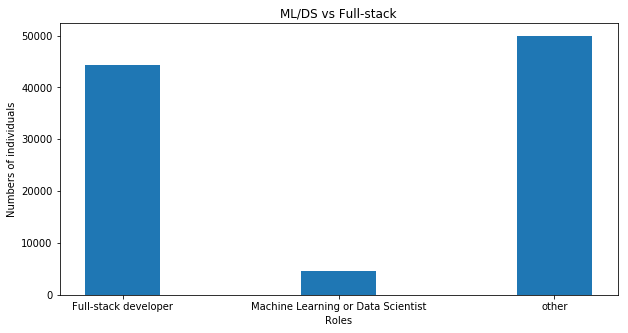

In [311]:
# Aggregate to new DevTypeAgg column
df['DevTypeAgg'] = 'other'

# Search for all entries with a DevType containing "machine learning" OR data scientist
df.loc[df['DevType'].str.contains("machine learning|data scientist", na=False),'DevTypeAgg'] = 'Machine Learning or Data Scientist'

# Search for all entries with a DevType containing "Full-stack developer"
df.loc[df['DevType'].str.contains("Full-stack developer", na=False),'DevTypeAgg'] = 'Full-stack developer'

# Plot results
plt.bar(df['DevTypeAgg'].value_counts().index, df['DevTypeAgg'].value_counts(), width=.35)
plt.ylabel('Numbers of individuals')
plt.xlabel('Roles')
plt.title('ML/DS vs Full-stack')
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

# Store total values
other_total = df['DevTypeAgg'].value_counts()[0]
fullstack_total = df['DevTypeAgg'].value_counts()[1]
mlds_total = df['DevTypeAgg'].value_counts()[2]

As we can see, the ML/DS role is less represented than the Full-stack and other categories.

This is somewhat understandable though considering that Data Scientist is a relatively newer term and more traditional software development roles have been around for decades.

### Strip Parentheses from Education Labels

In [228]:
# Strip out everything in parentheses for formal education x-axis
def strip_parentheses(arr):
    stripped_edu_vals = []
    for edu in arr:
        stripped_edu_vals.append(edu.split('(', 1)[0])
    return stripped_edu_vals

## Formal Education Overall

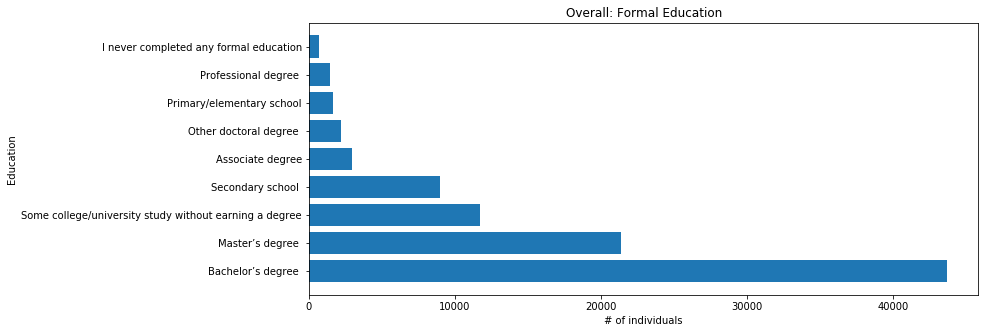

In [486]:
ytick_lbs = strip_parentheses(df['FormalEducation'].value_counts().index)
data_values = df['FormalEducation'].value_counts()

my_yticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.barh(my_yticks, data_values)
ax1.set_title("Overall: Formal Education")
ax1.set_yticks(my_yticks)
ax1.set_yticklabels(ytick_lbs)

plt.ylabel('Education')
plt.xlabel('# of individuals')
plt.show()

As we can see, a Bachelor's degree (44%) is by far the most popular choice for formal education overall, followed by a masters degree (22%) and then those who attended college but never attained a degree (12%).

## Formal Education for ML/DS

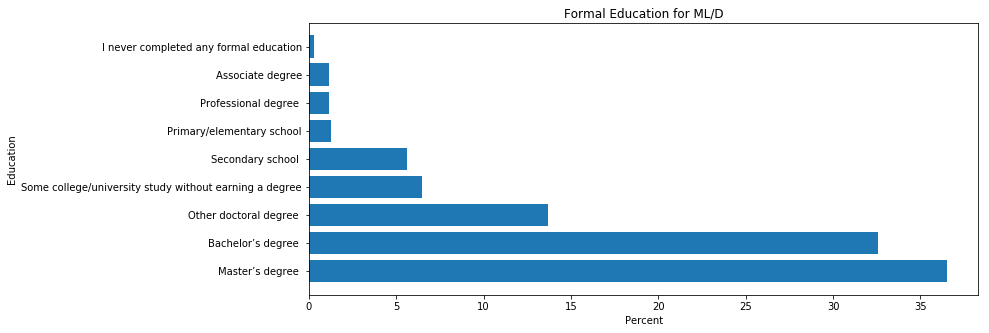

In [487]:
# Select all ML/DS
ml_ds = df[df['DevTypeAgg'] == 'Machine Learning or Data Scientist']

# Formal education type counts
ml_ds_counts = ml_ds['FormalEducation'].value_counts()
ml_ds_edu_percentages = []

for count in ml_ds_counts:
    ml_ds_edu_percentages.append((count / mlds_total) * 100)
    
ml_ds_edu_percentages = np.around(ml_ds_edu_percentages, decimals=2)

ytick_lbs = strip_parentheses(ml_ds_counts.index)
data_values = ml_ds_edu_percentages

my_yticks = [i for i in range(len(ytick_lbs))]

fig, ax1 = plt.subplots()
ax1.barh(my_yticks, data_values)
ax1.set_title("Formal Education for ML/D")
ax1.set_yticks(my_yticks)
ax1.set_yticklabels(ytick_lbs)
plt.ylabel('Education')
plt.xlabel('Percent')
plt.show()

For the ML/DS category, it appears that a Master’s degree is the most popular choice, followed by a Bachelor’s degree and a Ph.D.  I was surprised to see how popular a master’s degree is and I was even more surprised to see that nearly 14% had attained a Ph.D., especially considering that when examining formal education overall, only 2.24% had a Ph.D.

## Formal Education for Full-stack developers

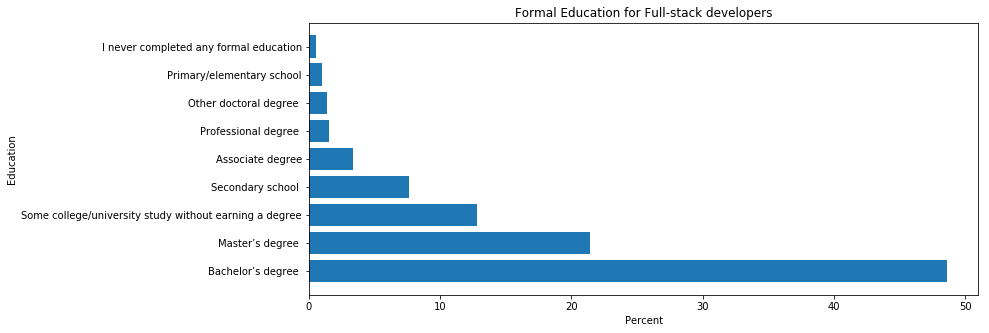

In [508]:
# Select all Full-stack developer
fs = df[df['DevTypeAgg'] == 'Full-stack developer']

# Formal education type counts
fs_counts = fs['FormalEducation'].value_counts()

fs_edu_percentages = []

for count in fs_counts:
    fs_edu_percentages.append((count / fullstack_total) * 100)
    
fs_edu_percentages = np.around(fs_edu_percentages, decimals=2)

# Plot results
xtick_lbs = strip_parentheses(fs_counts.index)
data_values = fs_edu_percentages

my_xticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.barh(my_xticks, data_values)
ax1.set_title("Formal Education for Full-stack developers")
ax1.set_yticks(my_xticks)
ax1.set_yticklabels(xtick_lbs)
plt.ylabel('Education')
plt.xlabel('Percent')
plt.show()

Unlike the ML/DS category, a Bachelor’s degree is the most popular choice for a Full-stack developer, followed by a masters degree.  What really shocked me was the difference in the Ph.D. category for ML/DS and full-stack developers.  While 14% of ML/DS had a Ph.D., only 1.38% of full-stack developers had a Ph.D.

## ML/DS salaries

I am plotting the salaries based on the medians in each category due to skewed salary data.

### Clean and convert the Salary column

In [ ]:
# Clean and convert the Salary column
sals = df[df['Salary'].notnull()]
sals['Salary']

sals['Salary'] = sals['Salary'].str.replace(',','')
stripped_sals = sals['Salary'].astype(float)
stripped_sals

df['Salary'] = stripped_sals

Before I can work with the Salary data, it's going to have to be in the proper format. Upon initial inspection of the data, I realized there were quite a few NaN values and values containing commas. Here I and removing all Null values, removing commas and converting the column from a string type to a float so that I can perform numerical computations.

In [471]:
# Calculate median salaraies for ML/DS for each type of Formal Education
median_MLDS_salaries = []
for edu in ml_ds_counts.index:
    median_MLDS_salaries.append(ml_ds[ml_ds['FormalEducation'] == edu]['Salary'].median())

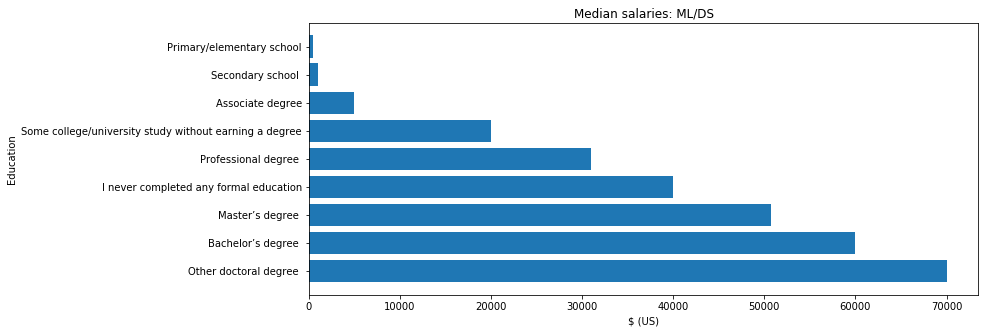

In [430]:
df_MLDS_medians = pd.DataFrame(median_MLDS_salaries, ml_ds_counts.index)
df_MLDS_medians.columns = ['median']
df_MLDS_medians = df_MLDS_medians.sort_values(by=['median'], ascending=False)

# Plot results
xtick_lbs = strip_parentheses(df_MLDS_medians.index)
data_values = df_MLDS_medians['median']

my_xticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.barh(my_xticks, data_values)
ax1.set_title("Median salaries: ML/DS")
ax1.set_yticks(my_xticks)
ax1.set_yticklabels(xtick_lbs)
plt.ylabel('Education')
plt.xlabel('$ (US)')
plt.show()

There seems to be a clear advantage to having a Ph.D. for the ML/DS category but not as much as I had anticipated. Roughly a $10,000 increase in salary from a Bachelor’s degree hardly seems worth it considering the costs incurred during the process of attaining a Ph.D.

## Full-stack salaries: Median

In [363]:
# Calculate median salaraies for ML/DS for each type of Formal Education
median_FS_salaries = []
for edu in fs_counts.index:
    median_FS_salaries.append(fs[fs['FormalEducation'] == edu]['Salary'].median())

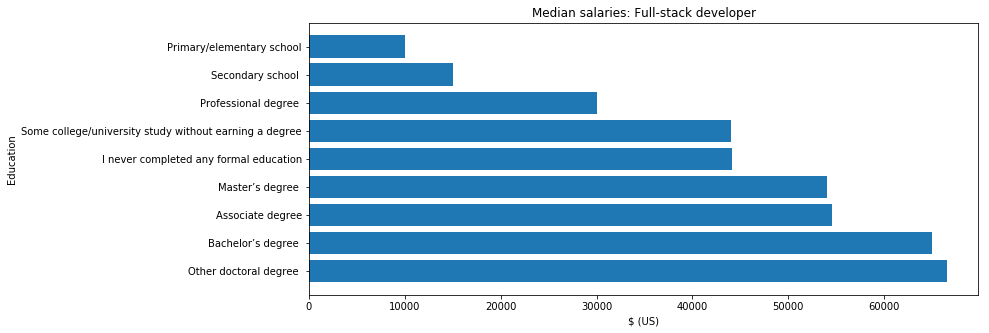

In [431]:
df_FS_medians = pd.DataFrame(median_FS_salaries, fs_counts.index)
df_FS_medians.columns = ['median']
df_FS_medians = df_FS_medians.sort_values(by=['median'], ascending=False)

# Plot results
xtick_lbs = strip_parentheses(df_FS_medians.index)
data_values = df_FS_medians['median']

my_xticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.barh(my_xticks, data_values)
ax1.set_title("Median salaries: Full-stack developer")
ax1.set_yticks(my_xticks)
ax1.set_yticklabels(xtick_lbs)
plt.ylabel('Education')
plt.xlabel('$ (US)')
plt.show()

Salaries seem much more evenly spread for Full-stack developers compared to ML/DS.  A Ph.D. seems to provide a clear advantage when it comes to salary for the ML/DS category, but this doesn’t seem to be the case here.  I was also surprised to see that the median salary for someone with their Masters was less than that of a Bachelor’s degree.

## ML/DS Ages

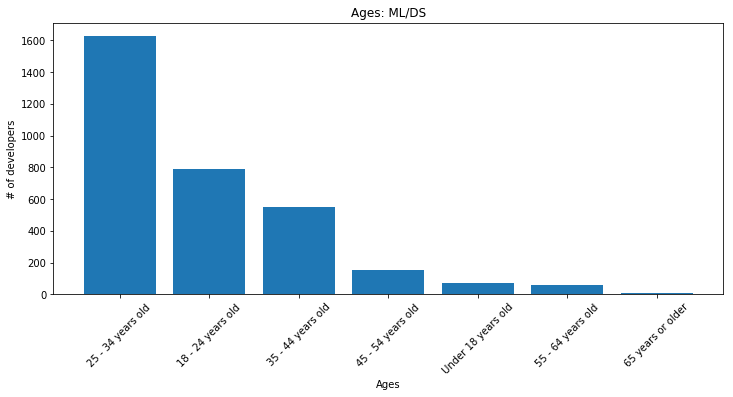

In [375]:
# Plot results
xtick_lbs = ml_ds['Age'].value_counts().index
data_values = ml_ds['Age'].value_counts()

my_xticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.bar(my_xticks, data_values)
ax1.set_title("Ages: ML/DS")
ax1.set_xticks(my_xticks)
ax1.set_xticklabels(xtick_lbs)
plt.xticks(rotation=45)
plt.ylabel('# of developers')
plt.xlabel('Ages')
plt.show()

## Full-stack developer Ages

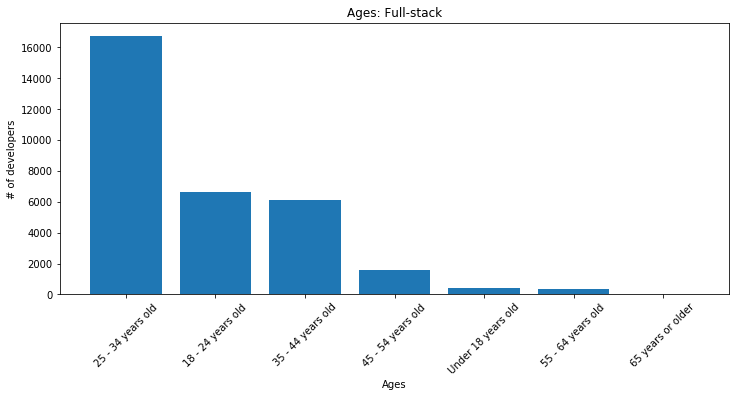

In [472]:
# Plot results
xtick_lbs = fs['Age'].value_counts().index
data_values = fs['Age'].value_counts()

my_xticks = [i for i in range(len(xtick_lbs))]

fig, ax1 = plt.subplots()
ax1.bar(my_xticks, data_values)
ax1.set_title("Ages: Full-stack")
ax1.set_xticks(my_xticks)
ax1.set_xticklabels(xtick_lbs)
plt.xticks(rotation=45)
plt.ylabel('# of developers')
plt.xlabel('Ages')
plt.show()

It’s apparent that the age ranges are quite similar between the 2 roles, with the vast majority falling within the 25 to 34 years old category.

After seeing these results, I believe it sheds some light on the unexpected salary results.  Someone with their Masters or Ph.D. will have spent years longer in school than someone with a Bachelors and therefore would not have been in the workforce as long.  Since the majority of individuals surveyed were younger, falling in the 25 to 34 years old bracket, those that spent longer in school would not have been in the workforce long enough to be promoted into a more senior role.

## Job Satisfaction

In [418]:
# ML/DS job satisfaction
ml_ds_jobsat_counts = ml_ds['JobSatisfaction'].value_counts()

ml_ds_jobsat_percentages = []

for count in ml_ds_jobsat_counts:
    ml_ds_jobsat_percentages.append((count / mlds_total) * 100)
    
ml_ds_jobsat_percentages = np.around(ml_ds_jobsat_percentages, decimals=2)

In [423]:
# FS job satisfaction
fs_jobsat_counts = fs['JobSatisfaction'].value_counts()

fs_jobsat_percentages = []

for count in fs_jobsat_counts:
    fs_jobsat_percentages.append((count / fullstack_total) * 100)
    
fs_jobsat_percentages = np.around(fs_jobsat_percentages, decimals=2)

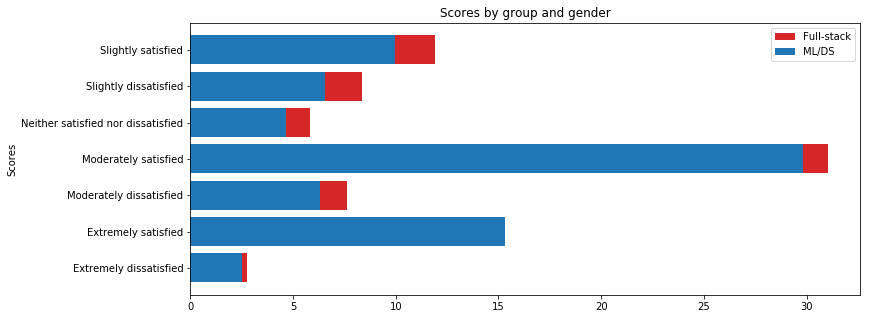

In [555]:
p1 = plt.barh(fs_jobsat_counts.index, fs_jobsat_percentages, color='#d62728')
p2 = plt.barh(ml_ds_jobsat_counts.index, ml_ds_jobsat_percentages)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.legend((p1[0], p2[0]), ('Full-stack', 'ML/DS'))

plt.show()

It’s evident that job satisfaction is similar between the two roles.  It seems like both roles are perceived as relatively fulfilling.

## Conclusion

In conclusion, it appears that ML/DS typically have a Master's, followed by a Bachelors and a Ph.D.  It was surprising to see that around 14% of ML/DS had attained a Ph.D, which is significantly more than the 1.38% of Full-stack developers.  I have yet to understand why there are so many in this field with advanced degrees.  I imagine that question carries with it a certain degree of subjectivity.

Even though around 50% of ML/DS had a Masters or Ph.D, it did not appear to significantly affect the currently reported salaries.  With a Ph.D. only providing a $10,000 increase over a Bachelors degree, it hardly seems worth the extra time and financial investment.  Having said that, I imagine a Ph.D. significantly decreases the barrier to entry into the industry.

The dominating age bracket could also be a contributing factor to the similar range of salaries.  Since those with a Bachelor's degree will likely have spent in the industry working professionally.  Or perhaps Ph.D's typically work in academia, which traditionally pays less than industry.

After completing this analysis which compared my existing role as a Full-stack software developer to an ML/DS, it's safe to say that I am excited to make the transition.

## Propose further research

I would like to identify why there is such a large gap in the number of Ph.D.’s between ML/DS and Full-stack developers?  Is it a job requirement?  If it is a requirement, is it a legitimate one?  Are Ph.D.’s driven to ML/DS for some reason?

Essentially, I would like to see how individuals with a Ph.D. and individuals with a Bachelors stack up to each other in the long run in this industry to identify any unique correlation between a Ph.D. and performance.